In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# XGBoost (install if needed)
from xgboost import XGBClassifier

# Save model
import joblib

# Settings
pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv("loan_approval_dataset.csv") 
print(df.head())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [3]:
print("Shape:", df.shape)

Shape: (4269, 13)


In [4]:
# Strip spaces from column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [5]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
print("\nDescribe (numeric):")
display(df.describe())


Describe (numeric):


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# Check target distribution
print("\nTarget distribution (loan_status):")
print(df["loan_status"].value_counts())

print("\nTarget distribution (%):")
print(df["loan_status"].value_counts(normalize=True) * 100)


Target distribution (loan_status):
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Target distribution (%):
loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64


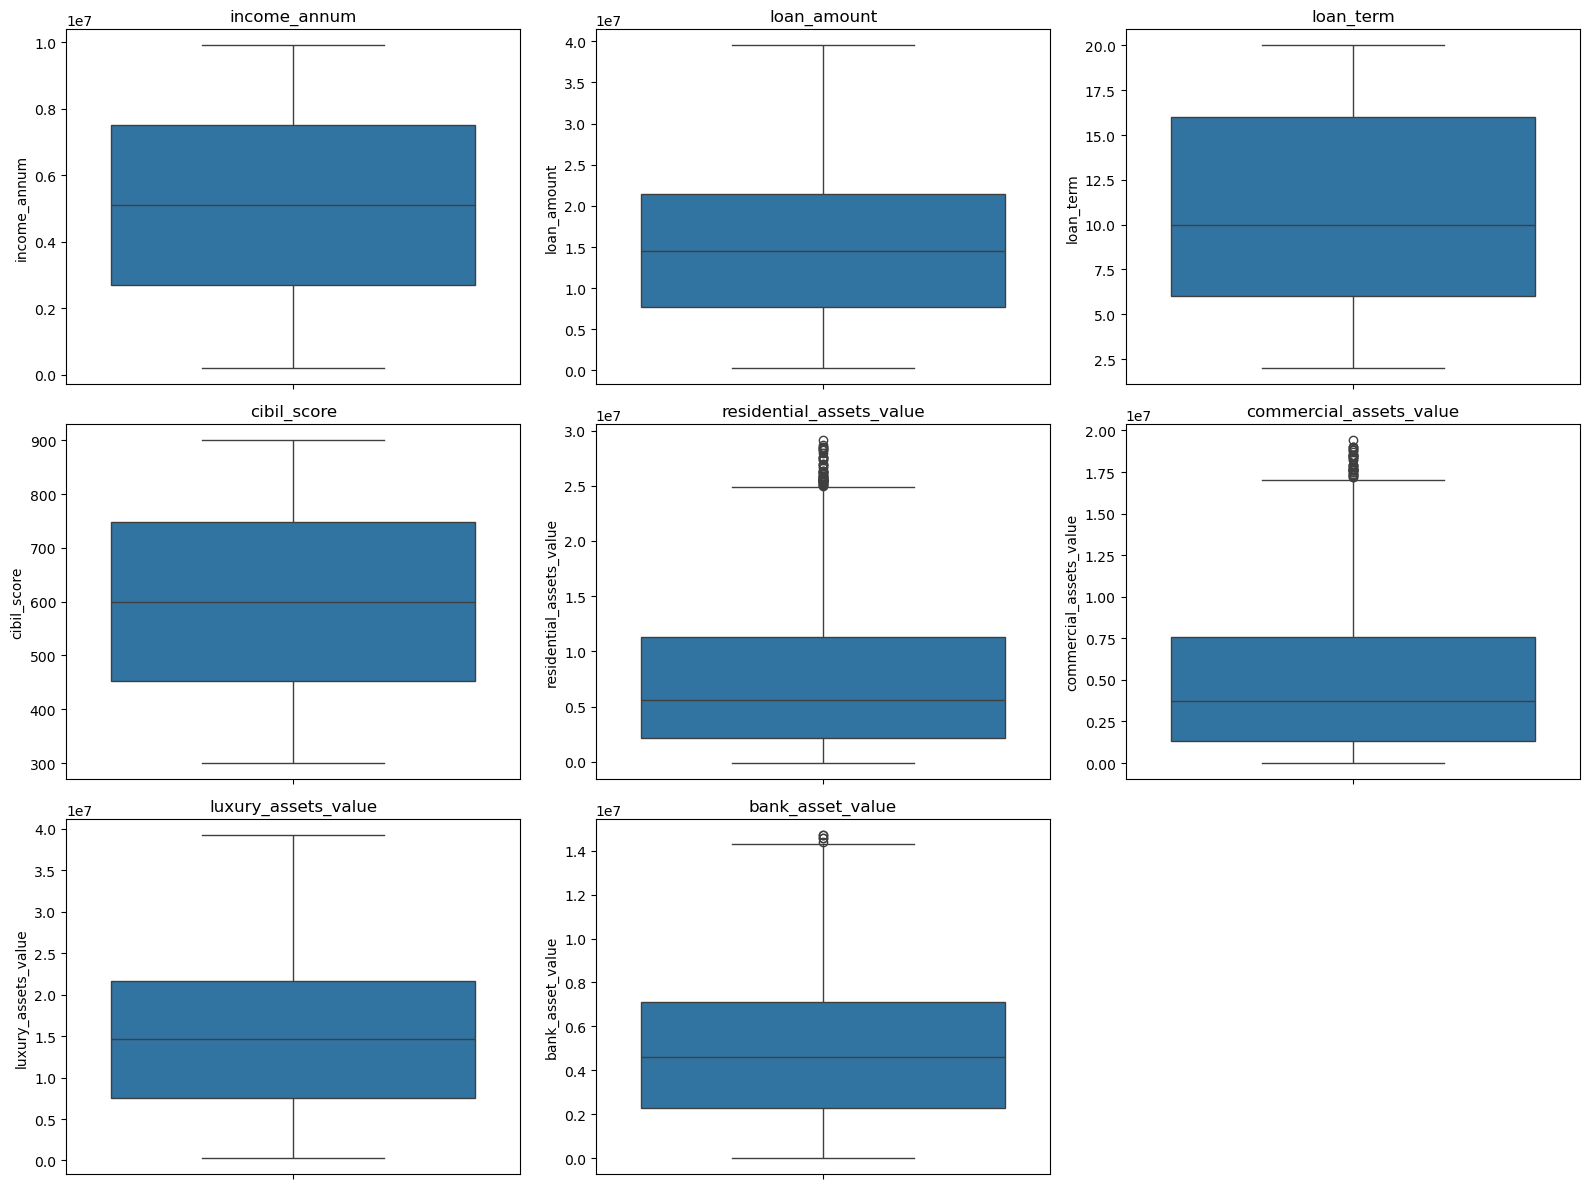

In [8]:
#Visualize Outliers (Boxplots)
import matplotlib.pyplot as plt
import seaborn as sns

num_cols_for_outliers = [
    "income_annum", "loan_amount", "loan_term",
    "cibil_score", "residential_assets_value",
    "commercial_assets_value", "luxury_assets_value",
    "bank_asset_value"
]

plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols_for_outliers, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

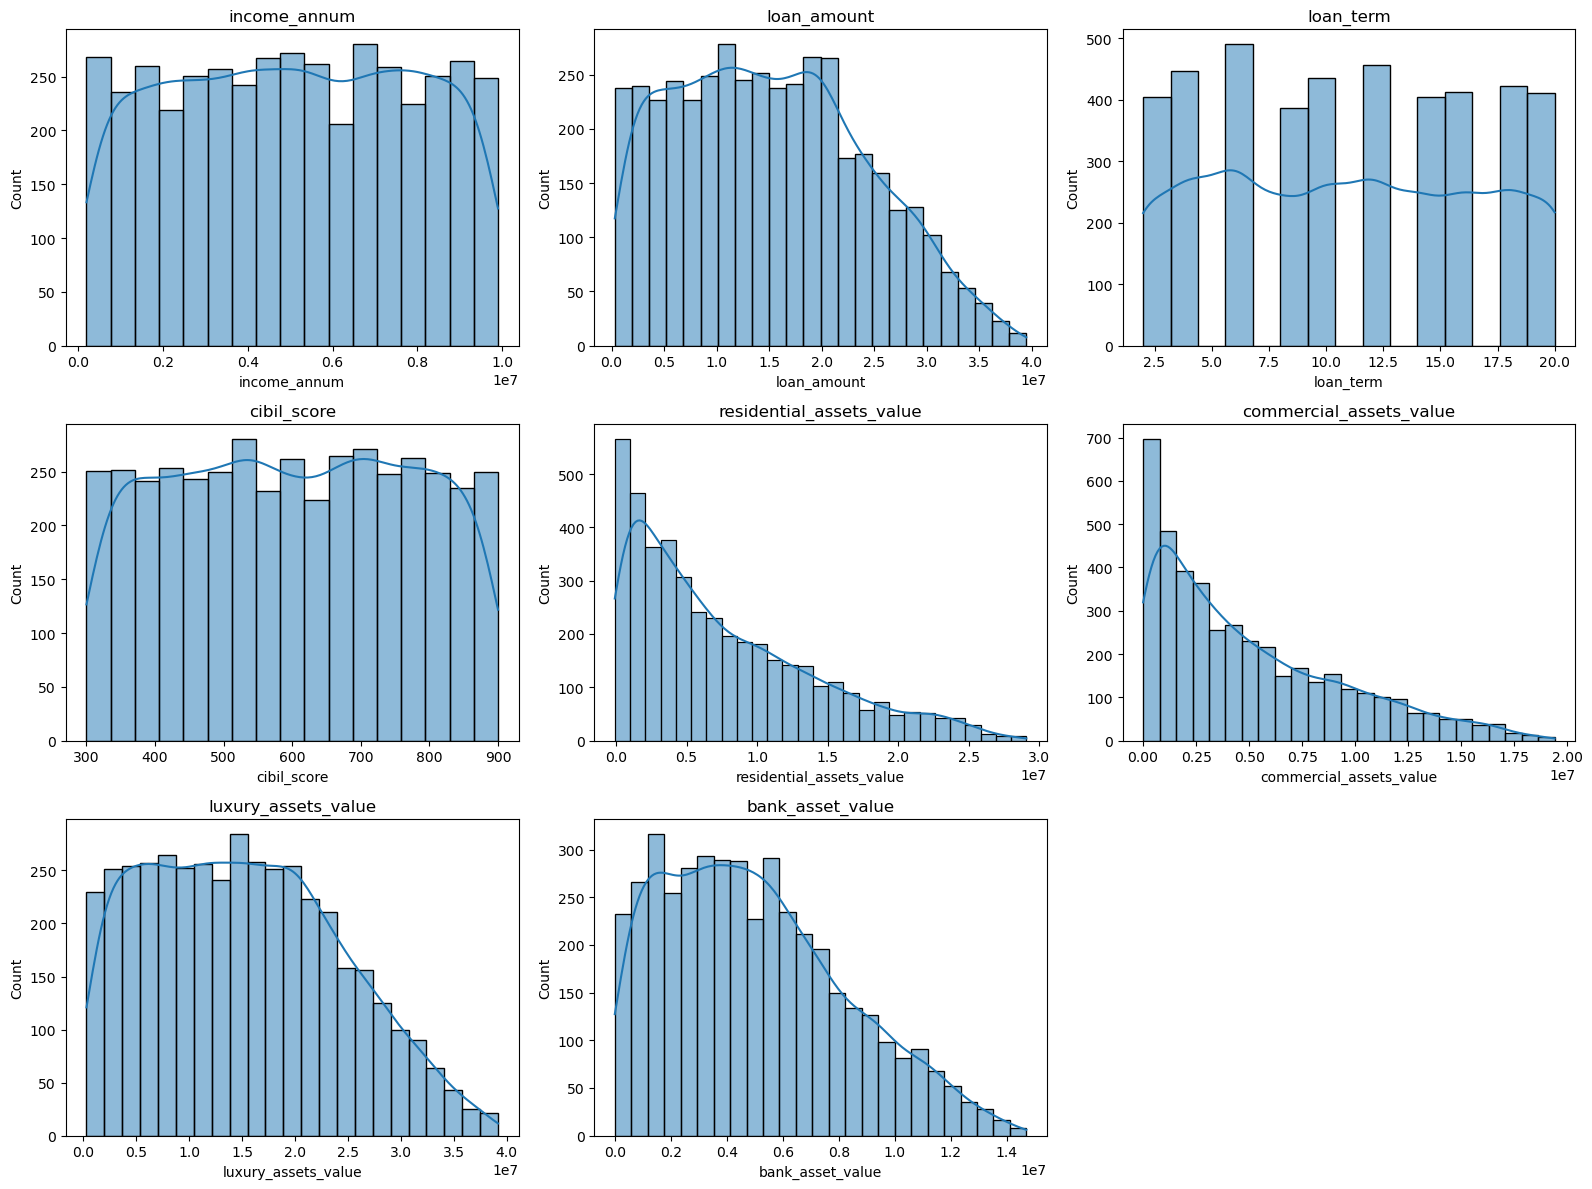

In [9]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_cols_for_outliers, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [10]:
# Checking if any numeric column has negative values
negatives = (df[[
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value", "no_of_dependents"
]] < 0).sum()

print("Negative values per column:")
print(negatives)


Negative values per column:
income_annum                 0
loan_amount                  0
loan_term                    0
cibil_score                  0
residential_assets_value    28
commercial_assets_value      0
luxury_assets_value          0
bank_asset_value             0
no_of_dependents             0
dtype: int64


Clipping negative values to 0

In [11]:
df["residential_assets_value"] = df["residential_assets_value"].clip(lower=0)

In [12]:
negatives = (df[[
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value", "no_of_dependents"
]] < 0).sum()

print("Negative values per column:")
print(negatives)

Negative values per column:
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
no_of_dependents            0
dtype: int64


In [13]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

log_cols = [
    "loan_amount", "residential_assets_value",
    "commercial_assets_value", "luxury_assets_value", "bank_asset_value"
]

log_transformer = FunctionTransformer(np.log1p, feature_names_out="one-to-one")

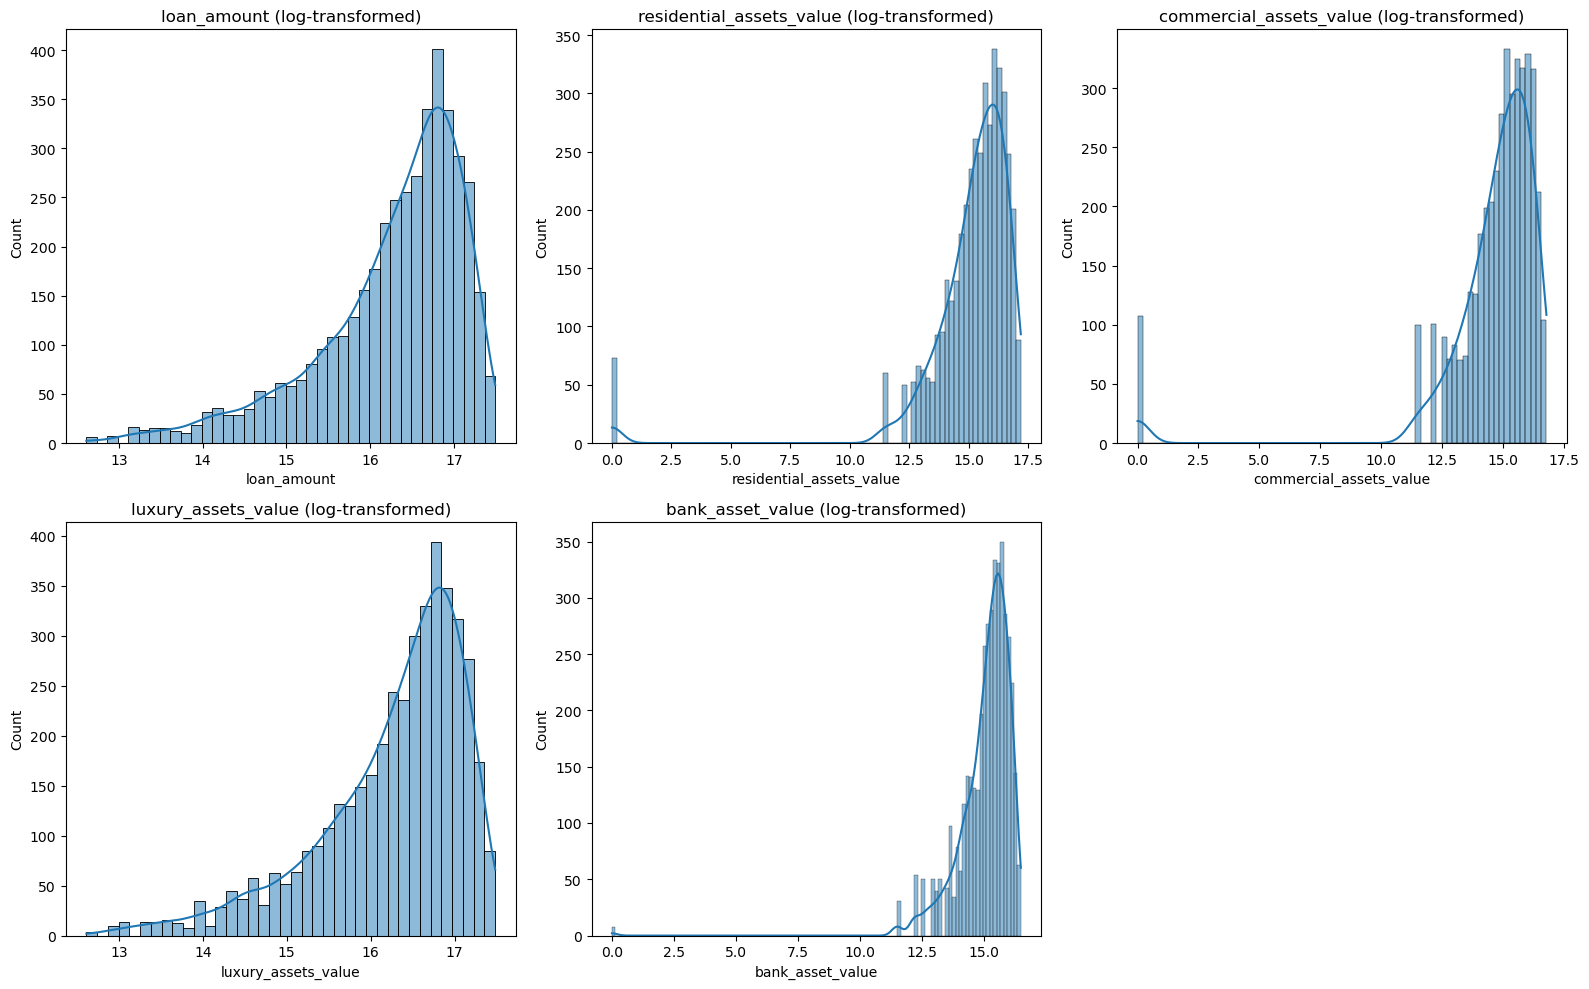

In [14]:
# Create a copy for visualization only
df_log_viz = df.copy()

# Apply log1p to selected skewed columns (for visualization)
for col in log_cols:
    df_log_viz[col] = np.log1p(df_log_viz[col])

# Plot distributions after log-transform
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

for i, col in enumerate(log_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_log_viz[col], kde=True)
    plt.title(f"{col} (log-transformed)")

plt.tight_layout()
plt.show()

In [15]:
print(df["loan_status"].unique())

[' Approved' ' Rejected']


In [16]:
df["loan_status"] = df["loan_status"].str.strip()
print(df["loan_status"].unique())

['Approved' 'Rejected']


In [17]:
# Target and features
X = df.drop(columns=["loan_status", "loan_id"])
y = df["loan_status"].map({"Approved": 1, "Rejected": 0})

# Column groups
num_cols_no_log = ["no_of_dependents", "income_annum", "loan_term", "cibil_score"]
cat_cols = ["education", "self_employed"]

print("X shape:", X.shape)
print("X shape:", y.shape)
print (X)
print(y)
print("y distribution:\n", y.value_counts(normalize=True) * 100)


X shape: (4269, 11)
X shape: (4269,)
      no_of_dependents      education self_employed  income_annum  \
0                    2       Graduate            No       9600000   
1                    0   Not Graduate           Yes       4100000   
2                    3       Graduate            No       9100000   
3                    3       Graduate            No       8200000   
4                    5   Not Graduate           Yes       9800000   
...                ...            ...           ...           ...   
4264                 5       Graduate           Yes       1000000   
4265                 0   Not Graduate           Yes       3300000   
4266                 2   Not Graduate            No       6500000   
4267                 1   Not Graduate            No       4100000   
4268                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        29900000         12          778                   240

Building the preprocessing pipeline